(-0.5, 3208.5, 2180.5, -0.5)

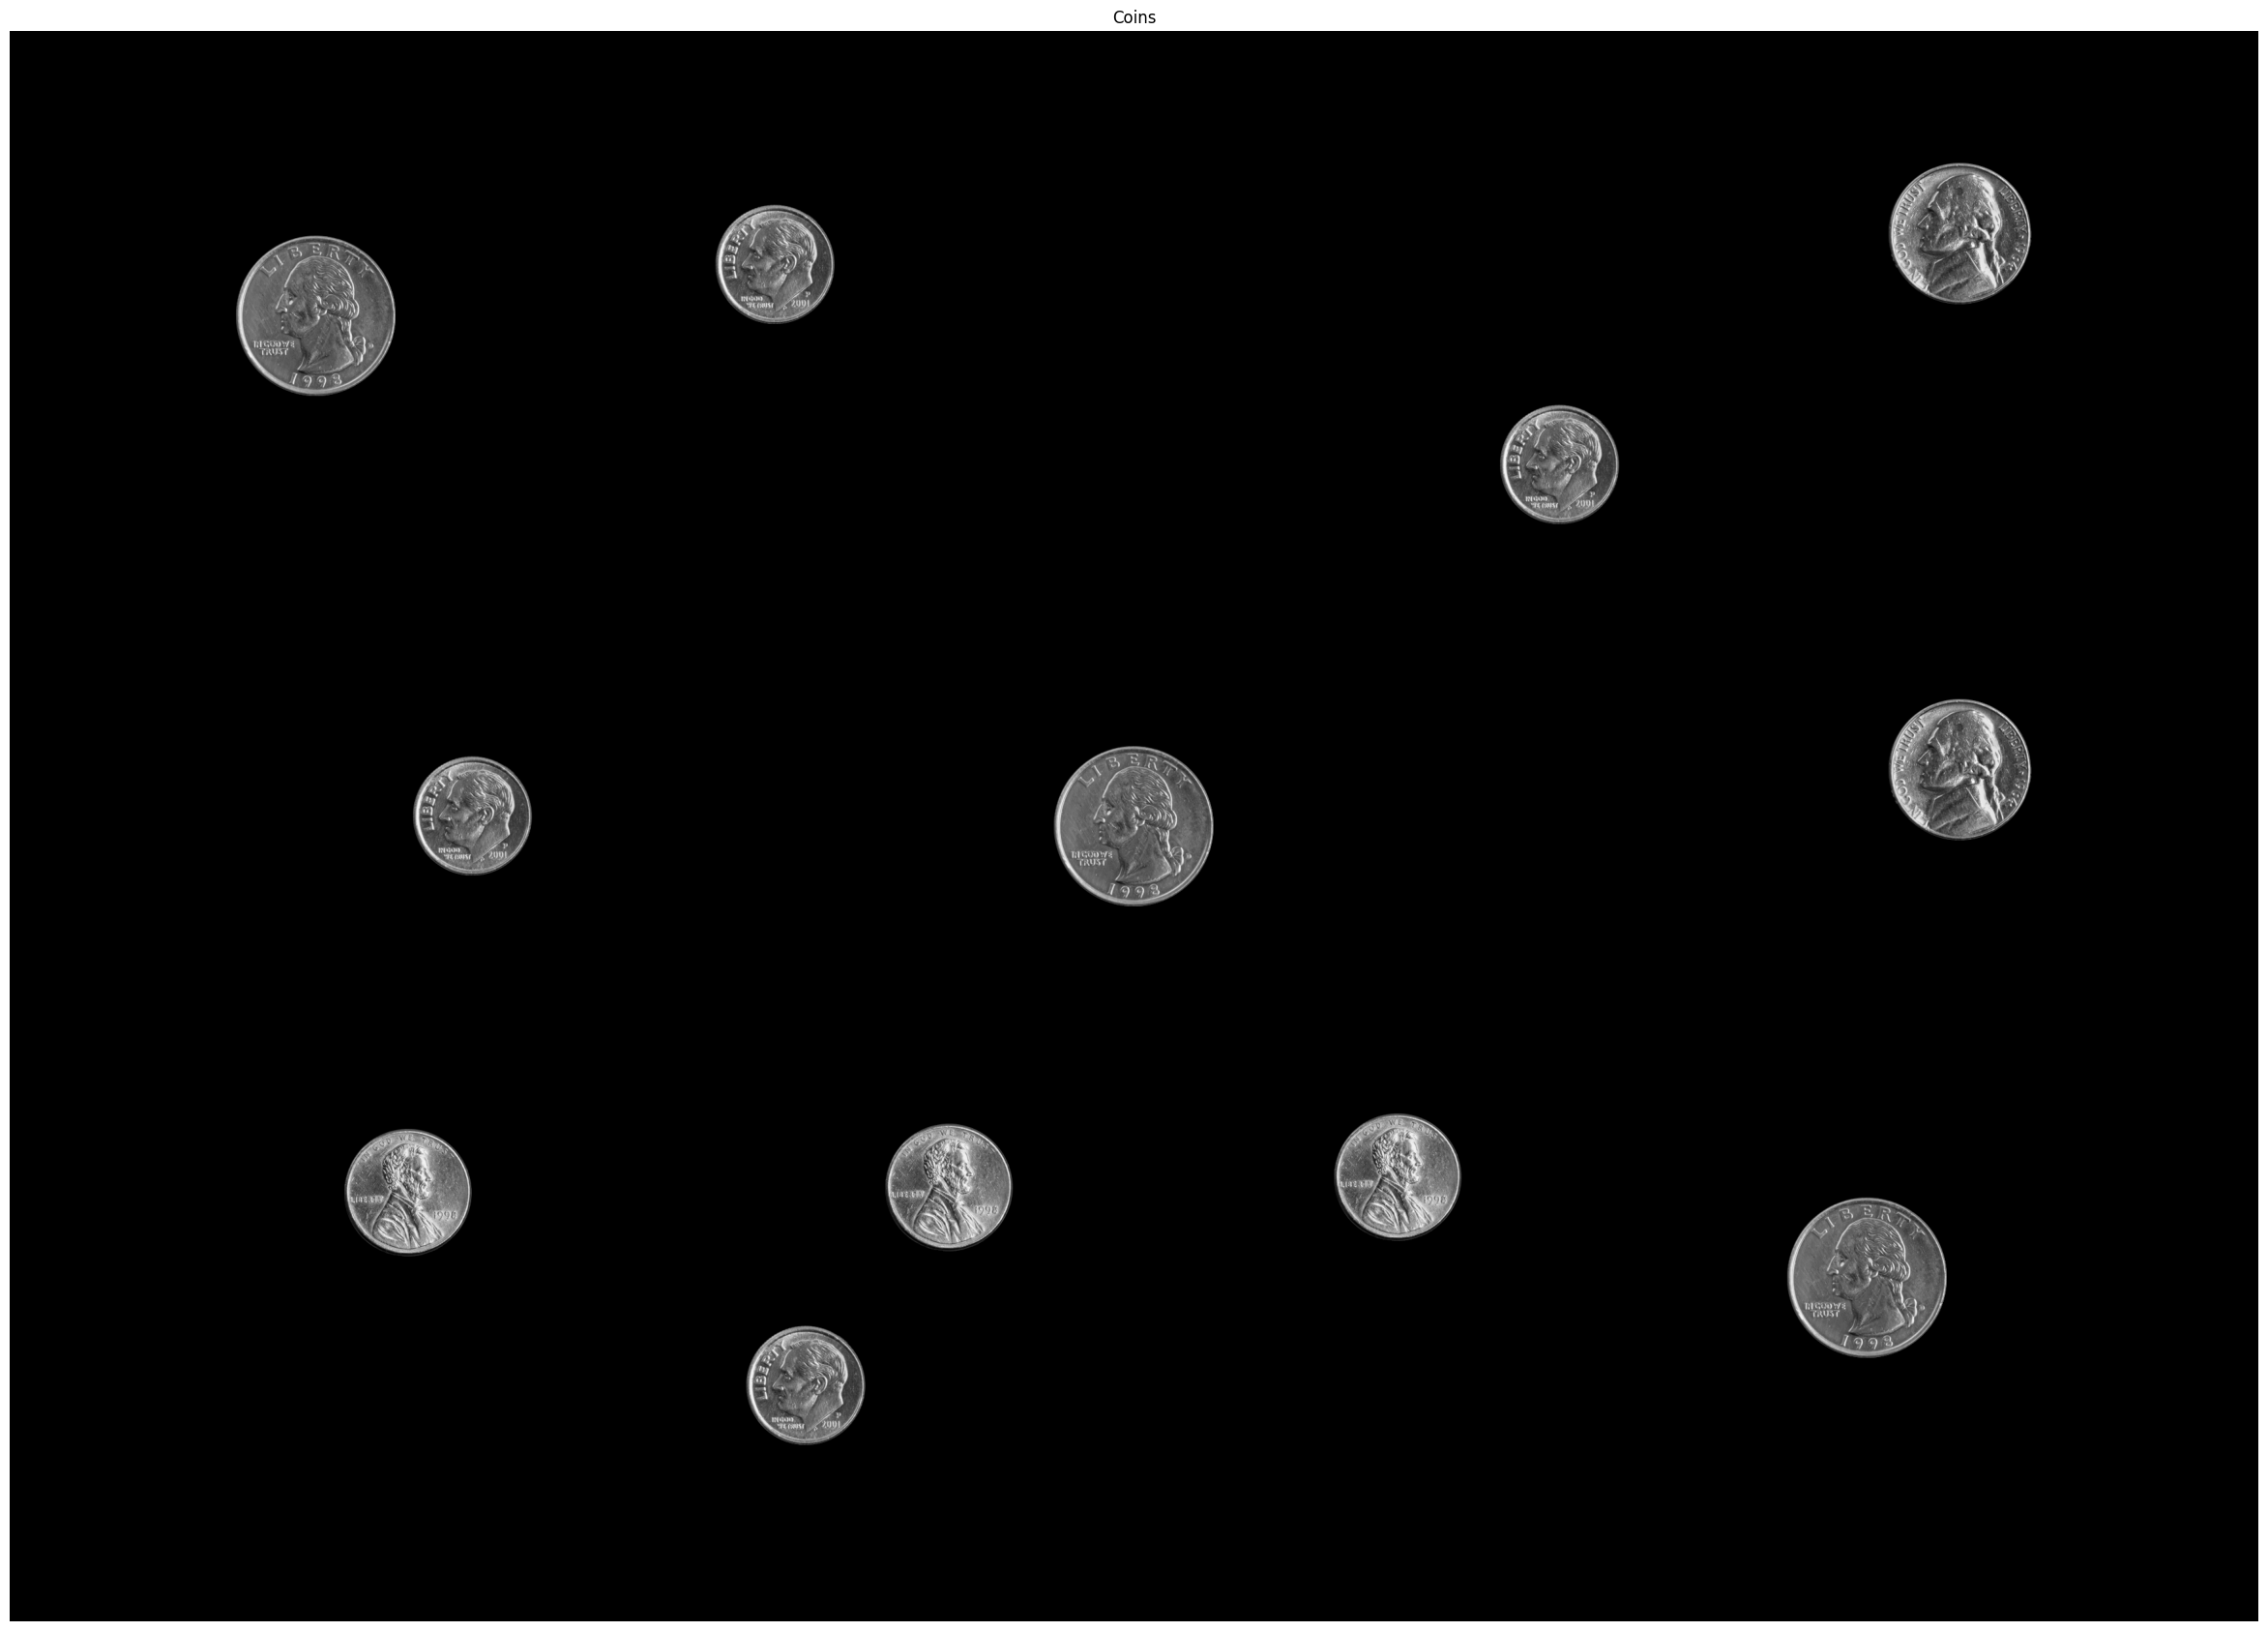

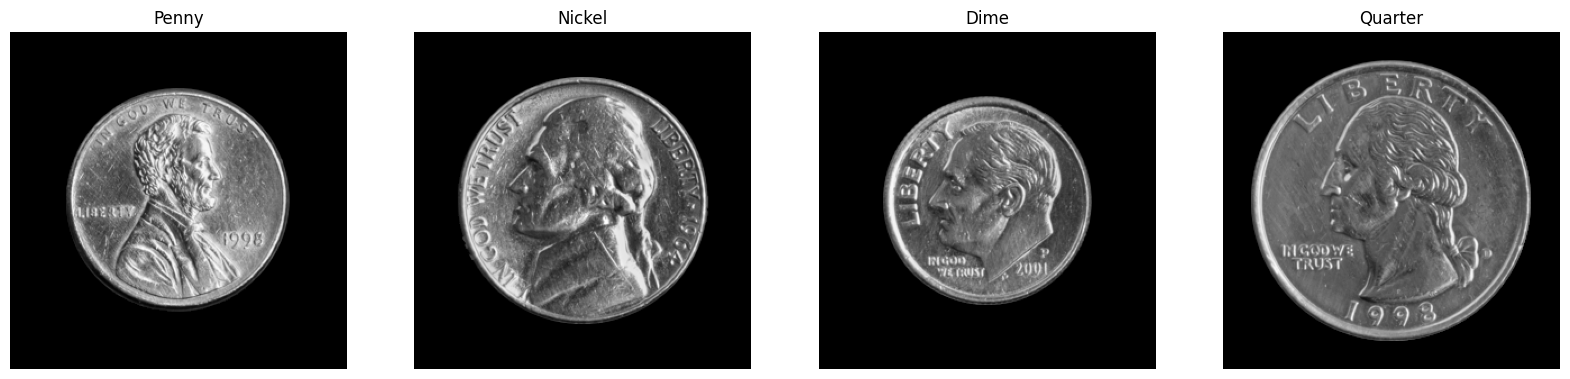

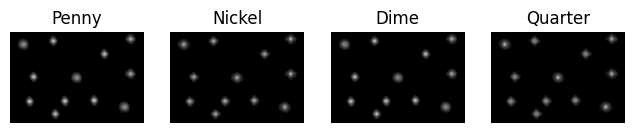

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

coins = cv.imread('coins/coins.png',cv.IMREAD_GRAYSCALE)
assert coins is not None
p = cv.imread('coins/Penny.png',cv.IMREAD_GRAYSCALE)
assert p is not None
n = cv.imread('coins/Nickel.png',cv.IMREAD_GRAYSCALE)
assert n is not None
d = cv.imread('coins/Dime.png',cv.IMREAD_GRAYSCALE)
assert d is not None
q = cv.imread('coins/Quarter.png',cv.IMREAD_GRAYSCALE)
assert q is not None

#Display Images
plt.figure(figsize=(30,30))
plt.subplot(1,1,1)
plt.imshow(X=coins,cmap="gray")
plt.title(label="Coins")
plt.axis("off")


plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(X=p,cmap="gray")
plt.title(label="Penny")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(X=n,cmap="gray")
plt.title(label="Nickel")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(X=d,cmap="gray")
plt.title(label="Dime")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(X=q,cmap="gray")
plt.title(label="Quarter")
plt.axis("off")

p_resp = cv.matchTemplate(coins,p,cv.TM_CCOEFF_NORMED)
n_resp = cv.matchTemplate(coins,n,cv.TM_CCOEFF_NORMED)
d_resp = cv.matchTemplate(coins,d,cv.TM_CCOEFF_NORMED)
q_resp = cv.matchTemplate(coins,q,cv.TM_CCOEFF_NORMED)


#Display Images
plt.figure(figsize=(10,10))
plt.subplot(1,5,1)
plt.imshow(X=p_resp,cmap="gray",vmin=0,vmax=1)
plt.title(label="Penny")
plt.axis("off")

plt.subplot(1,5,2)
plt.imshow(X=n_resp,cmap="gray",vmin=0,vmax=1)
plt.title(label="Nickel")
plt.axis("off")

plt.subplot(1,5,3)
plt.imshow(X=d_resp,cmap="gray",vmin=0,vmax=1)
plt.title(label="Dime")
plt.axis("off")

plt.subplot(1,5,4)
plt.imshow(X=q_resp,cmap="gray",vmin=0,vmax=1)
plt.title(label="Quarter")
plt.axis("off")


In [13]:
stacked = np.stack(arrays=[p_resp,n_resp,d_resp,q_resp],axis=2)
stacked.shape

(2181, 3209, 4)

In [44]:
from skimage.feature import peak_local_max

 # Colored image to draw the borders of each coin
Colored_coins = cv.cvtColor(coins, cv.COLOR_BGR2RGB)

# find the local maximum in 3D array and get coordinates to map each rectangle to the specific coin
coordinates = peak_local_max(stacked, exclude_border=0, min_distance=4, threshold_abs=0.8)
print(coordinates.shape)

(12, 3)


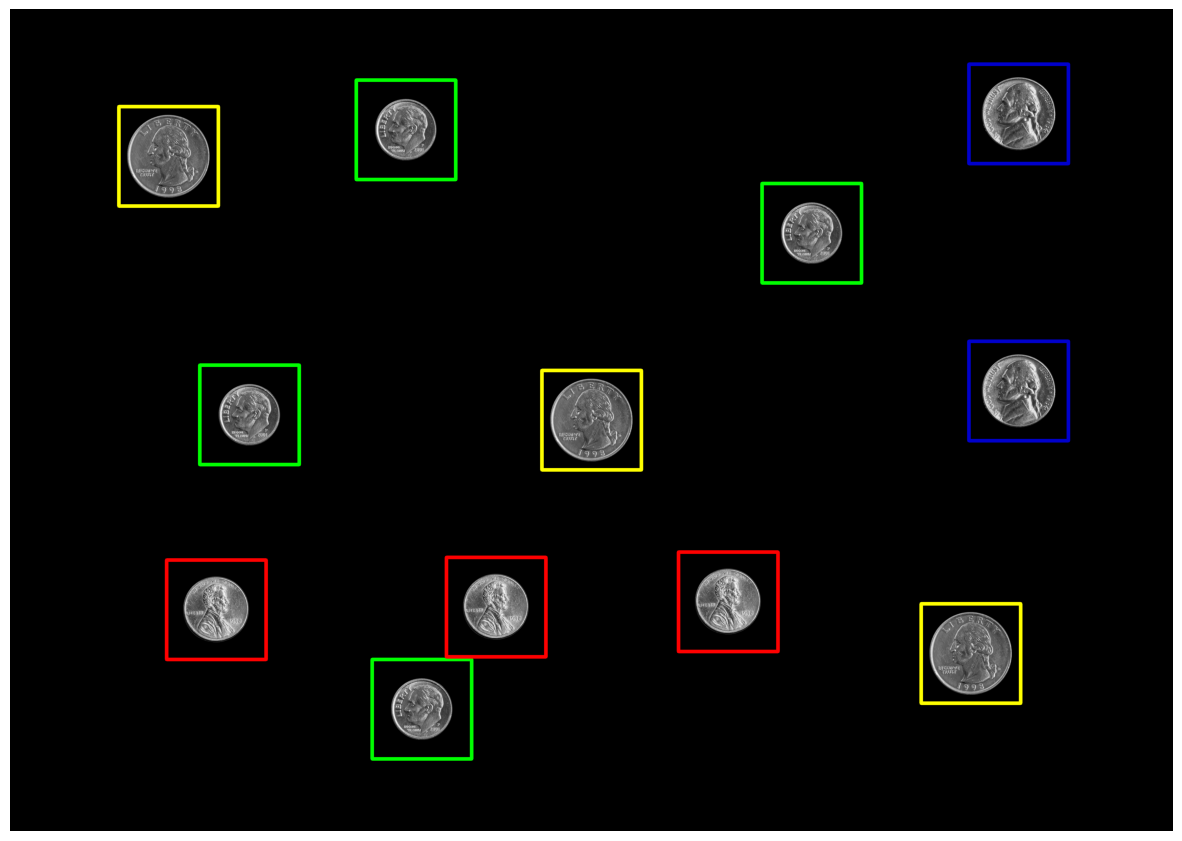

 Number of Pennies : 3
 Number of Nickels : 2
 Number of Dimes : 4
 Number of Quarters : 3 


In [43]:
from skimage.feature import peak_local_max

 # Colored image to draw the borders of each coin
Colored_coins = cv.cvtColor(coins, cv.COLOR_BGR2RGB)

# find the local maximum in 3D array and get coordinates to map each rectangle to the specific coin
coordinates = peak_local_max(stacked, exclude_border=0, min_distance=4, threshold_abs=0.8)

Colors = [
    (255,0,0), # Red for Penny
    (0,0,204), # Blue for Nickel
    (0,255,0),# Green for Dime
    (255,255,0)# yellow for Quarter
    ]

# Plot on each color 
for coord in coordinates:
  y, x, z = coord
  width,height = [p.shape[::-1], n.shape[::-1], d.shape[::-1], q.shape[::-1]][z]
  cv.rectangle(Colored_coins, (x, y), (x + width, y + height), Colors[z], thickness=10)
 
# Access the last element along the third axis
last_elements = coordinates[ :, -1] 

# Count the number of elements that are 0 in the last element
count_pennies = np.sum(last_elements == 0)

# Count the number of elements that are 1 in the last element
count_nickels = np.sum(last_elements == 1)

# Count the number of elements that are 2 in the last element
count_dimes = np.sum(last_elements == 2)

# Count the number of elements that are 3 in the last element
count_quarters = np.sum(last_elements == 3)
 
  
plt.figure(figsize=(15,15))
plt.imshow(Colored_coins)
plt.axis("off")
plt.show()

print (f" Number of Pennies : {count_pennies}\n Number of Nickels : {count_nickels}\n Number of Dimes : {count_dimes}\n Number of Quarters : {count_quarters} ")

### Added a Legend to indicate the colors for the specific coin

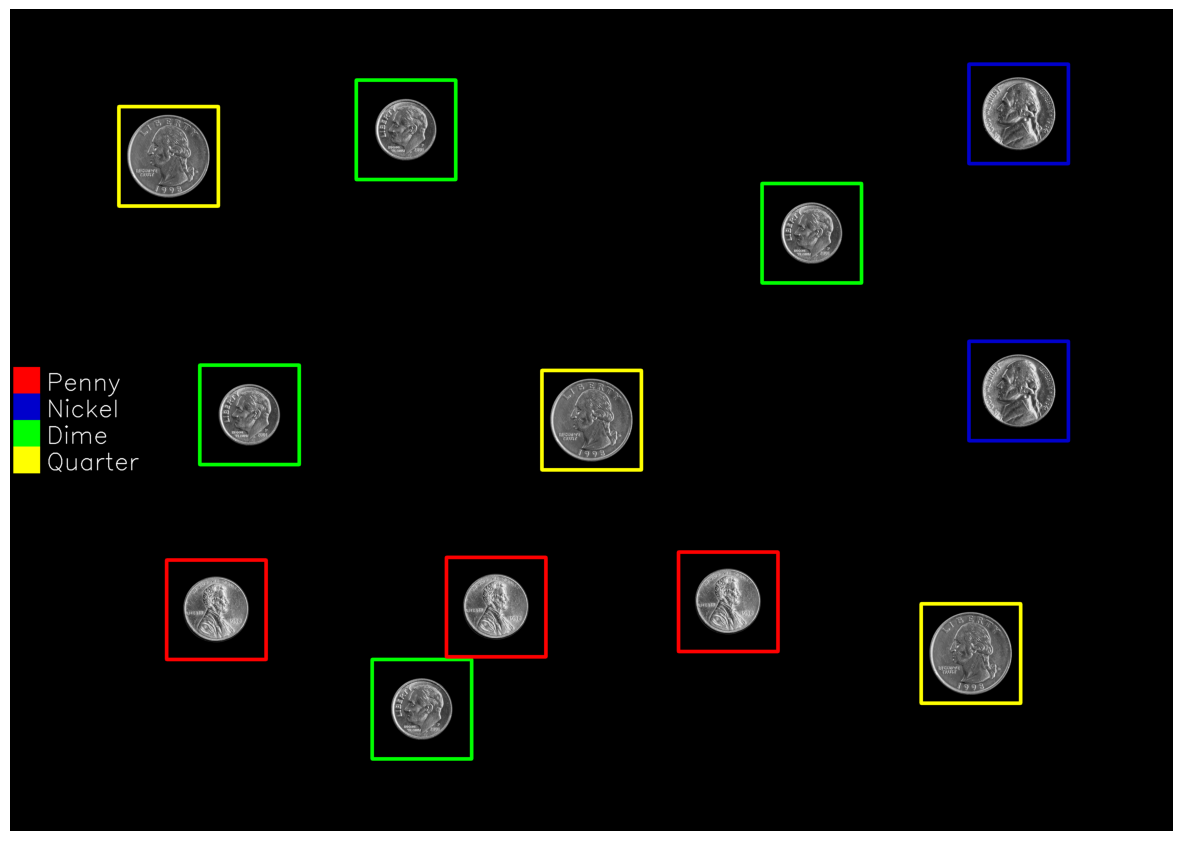

In [37]:
Coin_names = ["Penny", "Nickel", "Dime", "Quarter"]

legend_scale = 0.8
rectangle_size = 100  # Width and height of the rectangles in pixels

# Calculate the total height occupied by the legend
legend_height = int(len(Coin_names) * rectangle_size * legend_scale)  # Adjusted legend height based on scale

# Calculate the starting y-coordinate to vertically center the legend
start_y = (Colored_coins.shape[0] - legend_height) // 2

# Print a legend 
for i, (name, color) in enumerate(zip(Coin_names, Colors)):
  scaled_font_scale = legend_scale * 3  # Adjust font scale based on legend scale
  
  # Calculate rectangle coordinates
  rect_top_left = (10, start_y + int(rectangle_size * legend_scale * i))
  rect_bottom_right = (10 + int(rectangle_size * legend_scale), start_y + int(rectangle_size * legend_scale + rectangle_size * legend_scale * i))
  
  # Draw rectangle
  cv.rectangle(Colored_coins, rect_top_left, rect_bottom_right, color=color, thickness=-1)
  
  # Calculate text position
  text_x = 30 + int(rectangle_size * legend_scale)
  text_y = start_y + int(rectangle_size * legend_scale + 0.5 * rectangle_size * legend_scale * (2 * i + 1)) - int(rectangle_size/2)
  
  # Draw text
  cv.putText(Colored_coins, name, (text_x, text_y), fontFace=cv.FONT_HERSHEY_SIMPLEX, fontScale=scaled_font_scale, color=(255, 255, 255), thickness=2, lineType=cv.LINE_AA)

plt.figure(figsize=(15,15))
plt.imshow(X=Colored_coins)
plt.axis("off")
plt.show()

## Assumptions

1. 3D array: The code assumes the peak_local_max function is used on a 3D array (stacked), likely representing the intensity values across  different color channels. This is specific to the approach taken in this code.

2. Parameter settings: The function's parameters (exclude_border, min_distance, and threshold_abs) are set to specific values (0, 4, and 0.8, respectively). These might need to be adjusted based on the characteristics of the coins in the image to optimize detection accuracy.

